In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from interactions import *
import seaborn as sns

from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl

In [2]:
out_dir = 'bike_results'

In [4]:
df = pd.read_csv("../data/Bike-Sharing-Dataset/hour.csv", sep=',',header=None)
raw_data = np.genfromtxt("../data/Bike-Sharing-Dataset/hour.csv", delimiter=',')
labels = df.values[0, :]

In [5]:
raw_data = raw_data[1:, :]
raw_y = raw_data[:, 16]
raw_data = raw_data[:, 2:14]

In [6]:
X, X_test, y, y_test = train_test_split(raw_data, raw_y, test_size=.25)
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(13034, 12) (13034,)
(4345, 12) (4345,)


In [7]:
forest = RandomForestRegressor(n_estimators=50)
forest.fit(X, y)
preds = forest.predict(X_test)
rmse = np.sqrt(np.mean((y_test - preds) ** 2))
print("RMSE for estimator", rmse)

RMSE for estimator 41.57147196767789


In [8]:
features = labels[2:14]
features

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], dtype=object)

In [13]:
feat_intervals = [(1, 4.5), (0, 1.25), (1, 13), (0, 25), (0, 1.25), (0, 1.5), (0, 1.5), (1, 3.5), (0, 1), (0, 1), (0, 1), (0, 1)]
feat_di = [.5, .25, 1, 1, .25, .5, .5, .5, .1, .1, .1, .1]

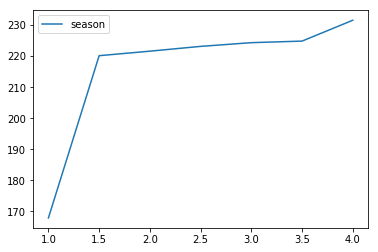

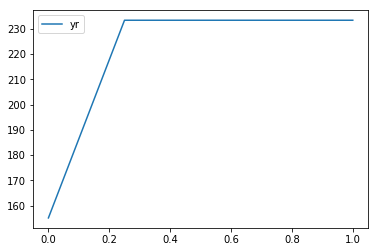

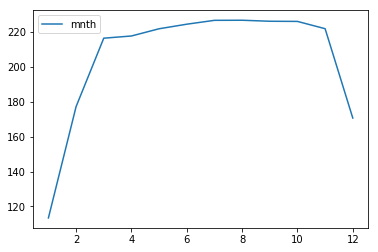

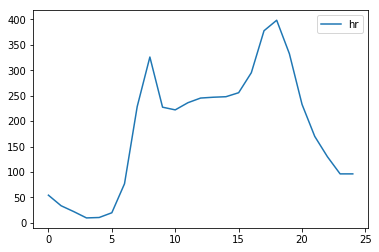

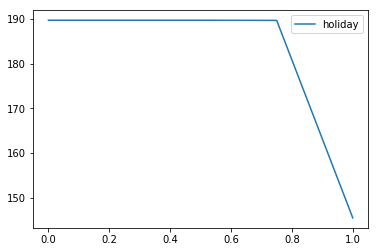

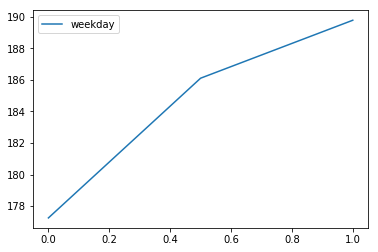

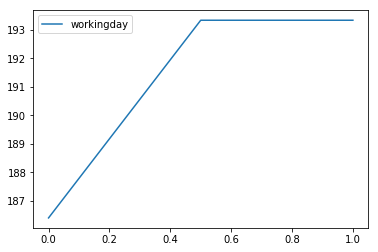

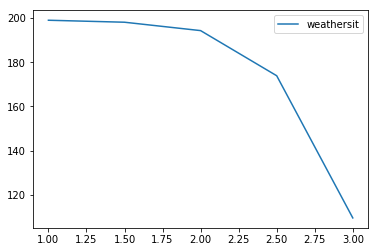

/Users/summer/Desktop/Research/rf_interactions/scores/interactions.py:288: RuntimeWarning: invalid value encountered in true_divide
  return line/counts


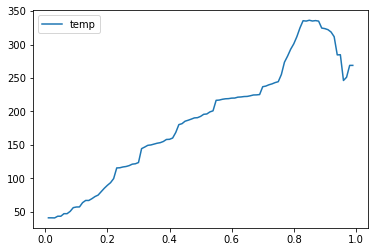

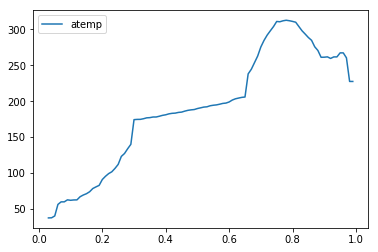

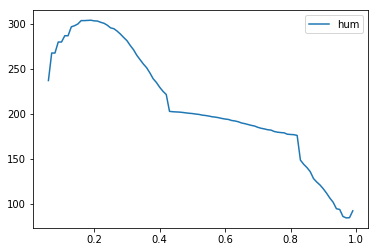

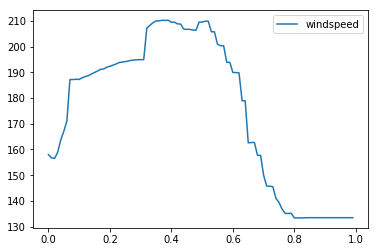

In [17]:
curves = {}
for i in range(len(features)):
    S = np.zeros(len(features))
    S[i] = 1
    feat_max = max(1, max(X[:, i]))
    curves_i = {}
    dac = make_curve_forest(forest, X, y, S, feat_intervals[i], feat_di[i], C = 1, continuous_y = True)
    curves_i["dac"] = dac
    curves[i] = deepcopy(curves_i)
    x_axis = np.arange(feat_intervals[i][0], feat_intervals[i][1], feat_di[i])
    plt.plot(x_axis, dac, label=features[i])
    plt.legend()
    plt.show()

season vs yr


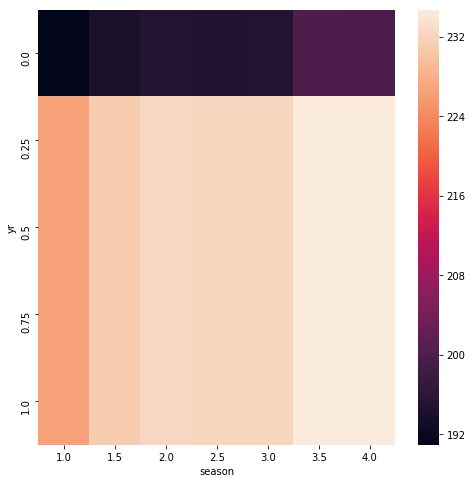

season vs mnth


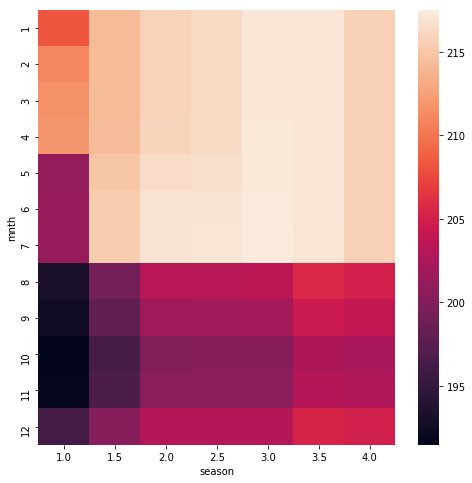

season vs hr


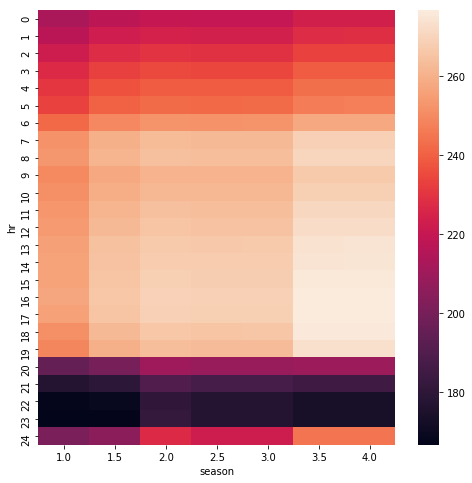

season vs holiday


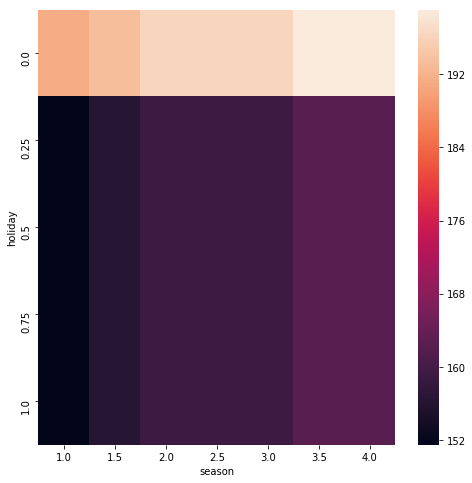

season vs weekday


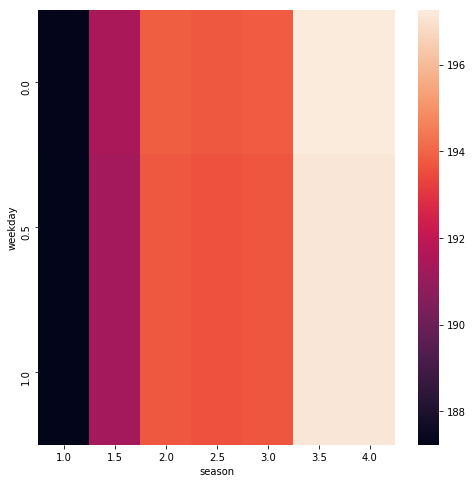

season vs workingday


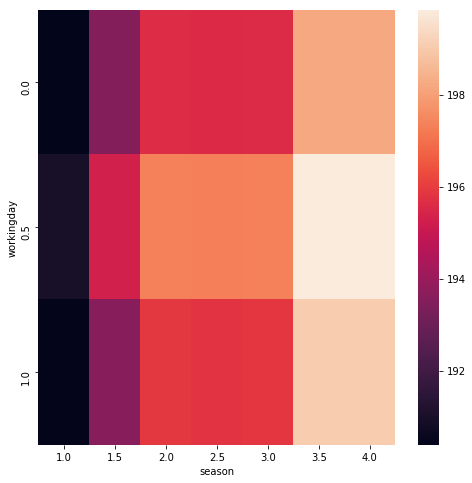

season vs weathersit


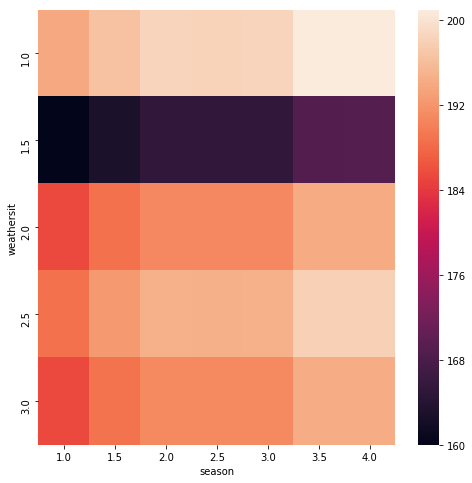

season vs temp


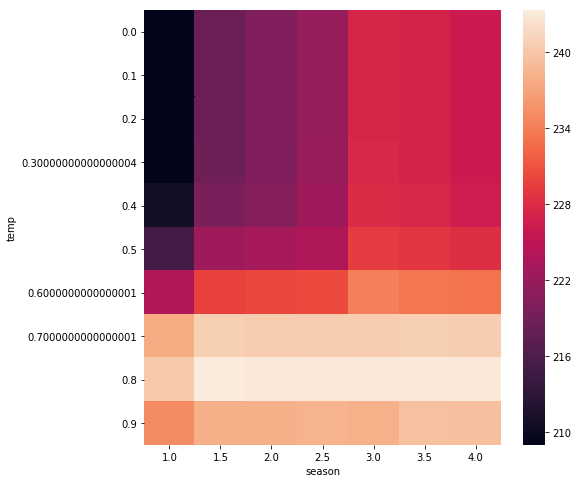

season vs atemp


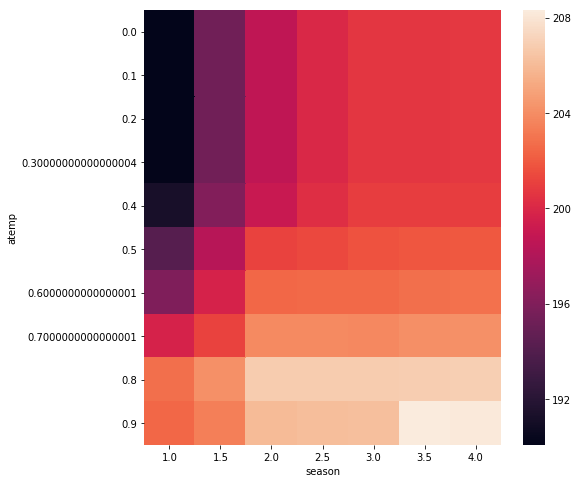

season vs hum


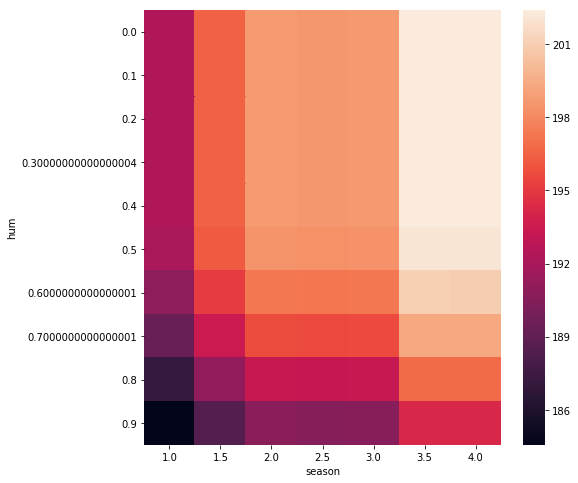

season vs windspeed


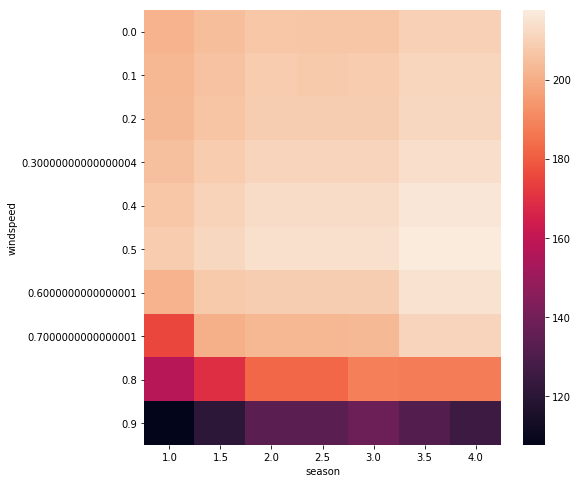

yr vs mnth


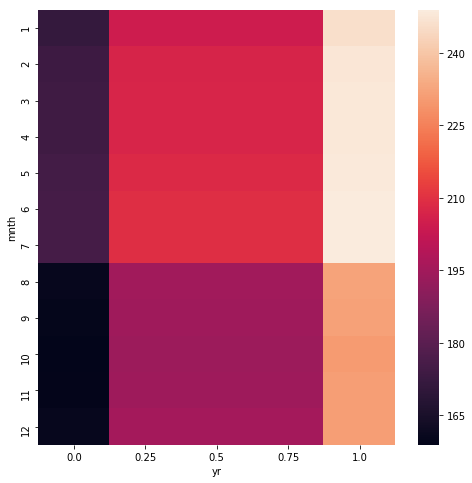

yr vs hr


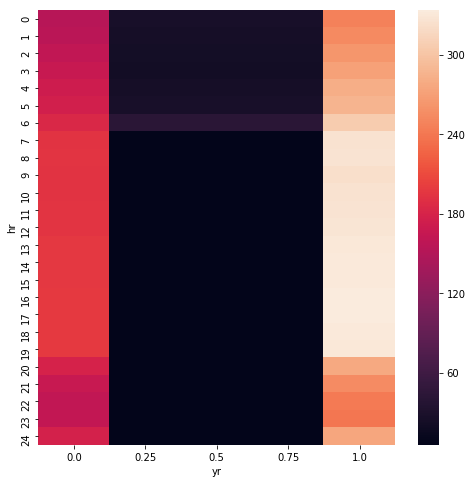

yr vs holiday


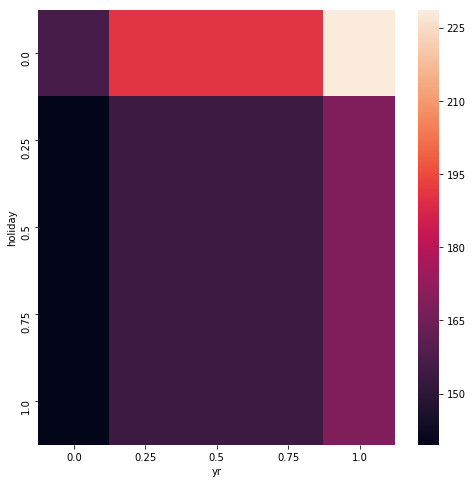

yr vs weekday


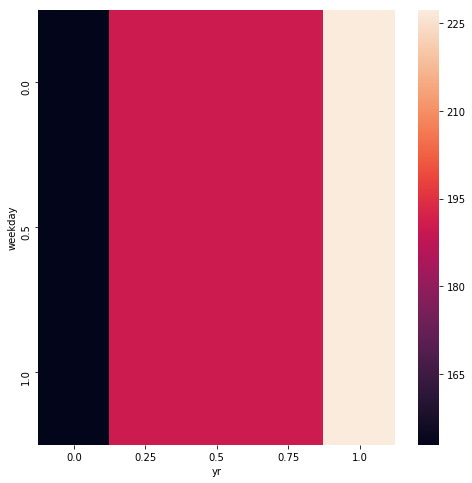

yr vs workingday


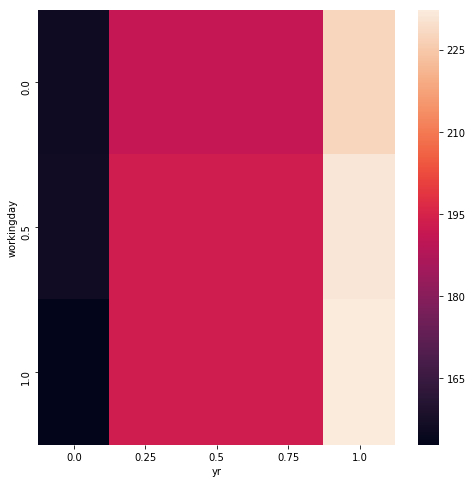

yr vs weathersit


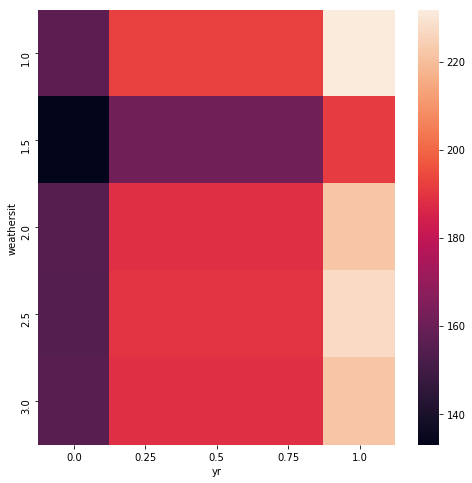

yr vs temp


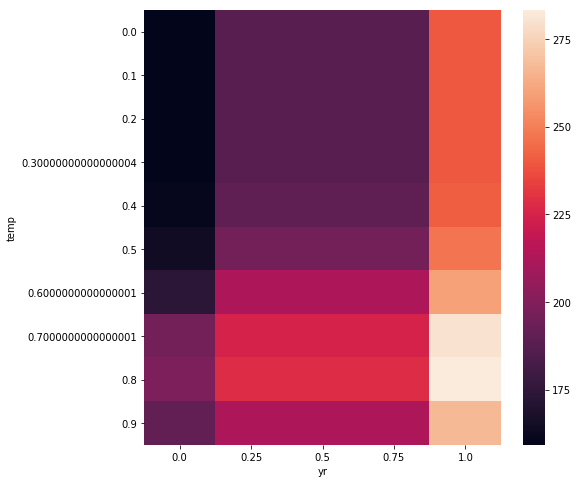

yr vs atemp


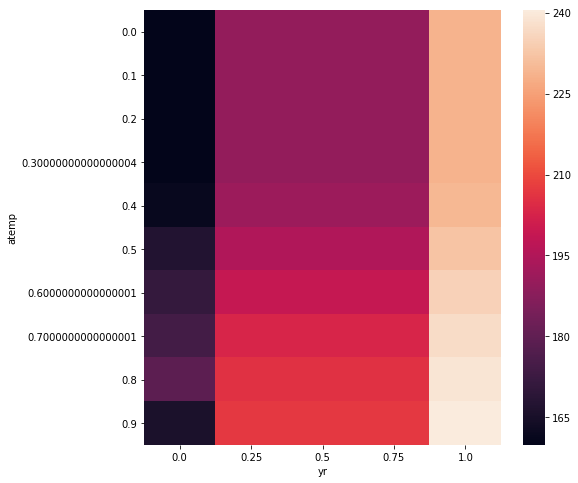

yr vs hum


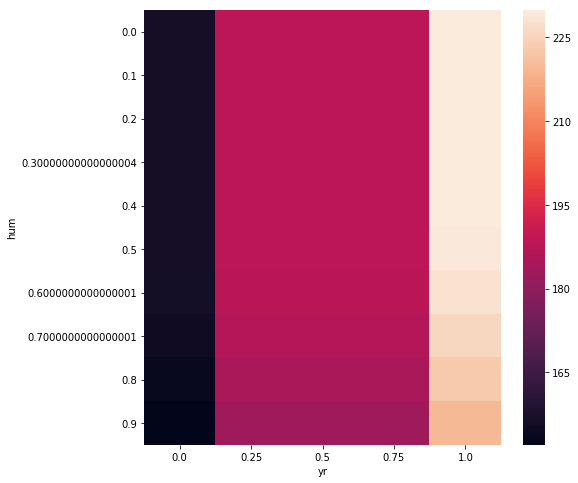

yr vs windspeed


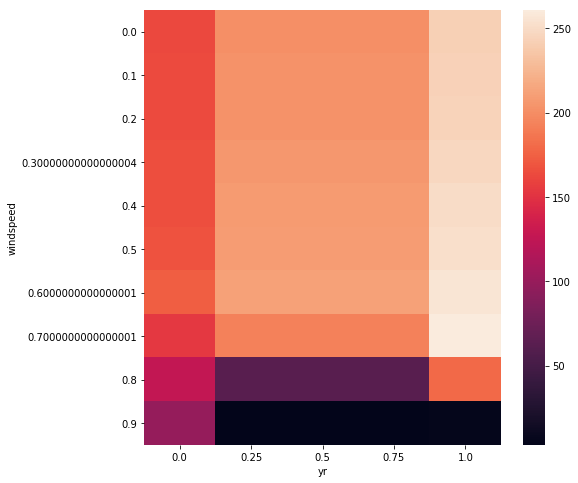

mnth vs hr


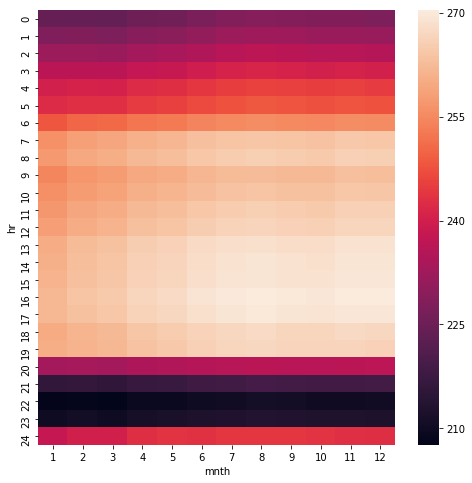

mnth vs holiday


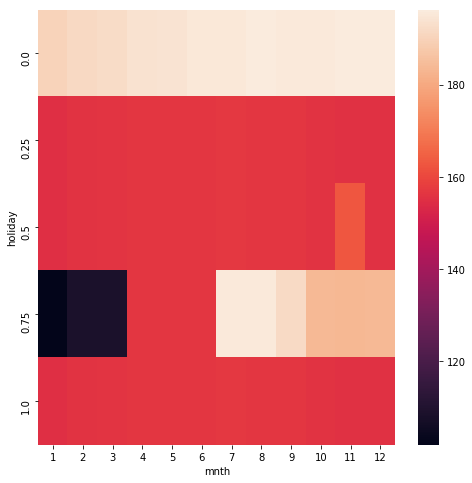

mnth vs weekday


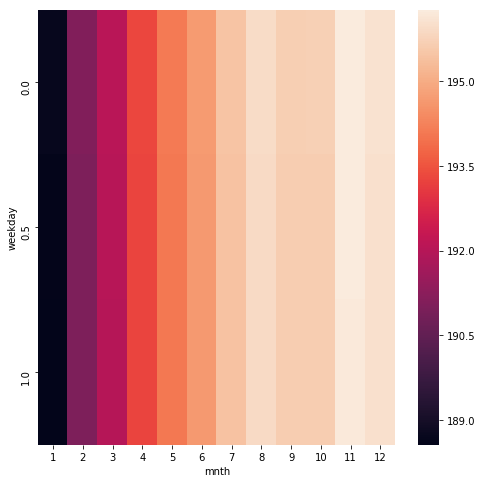

mnth vs workingday


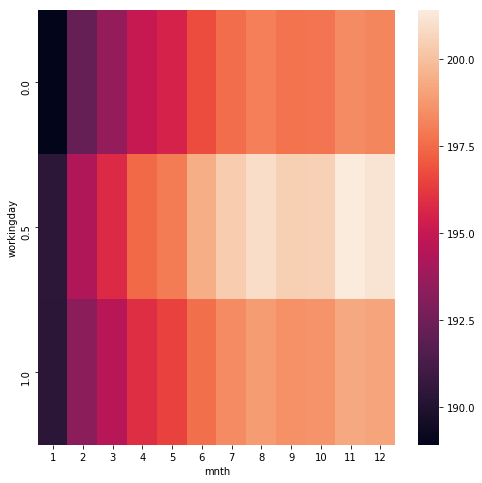

mnth vs weathersit


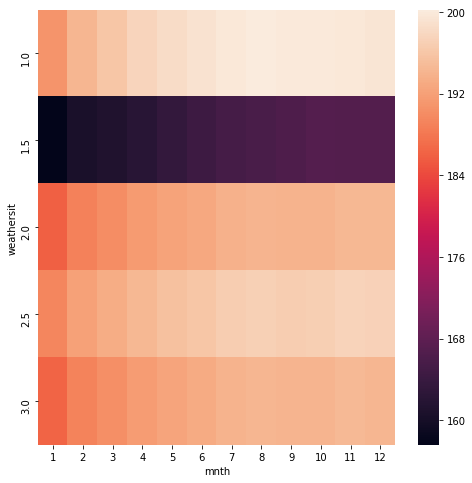

mnth vs temp


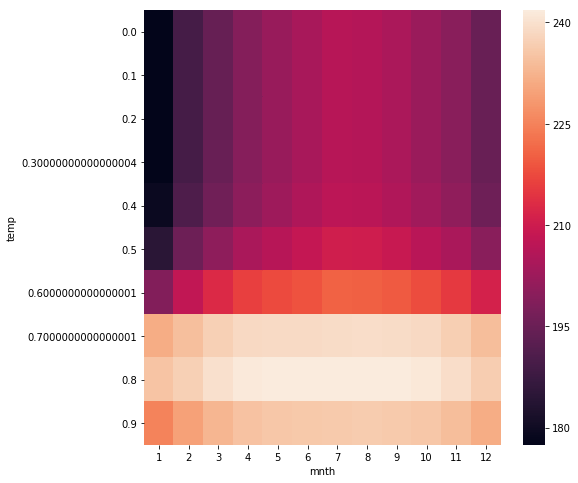

mnth vs atemp


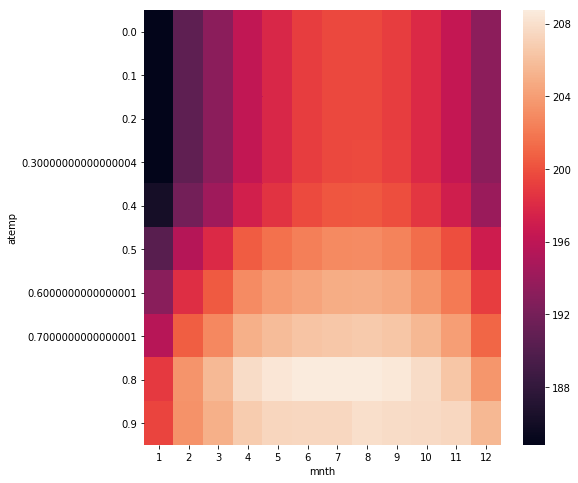

mnth vs hum


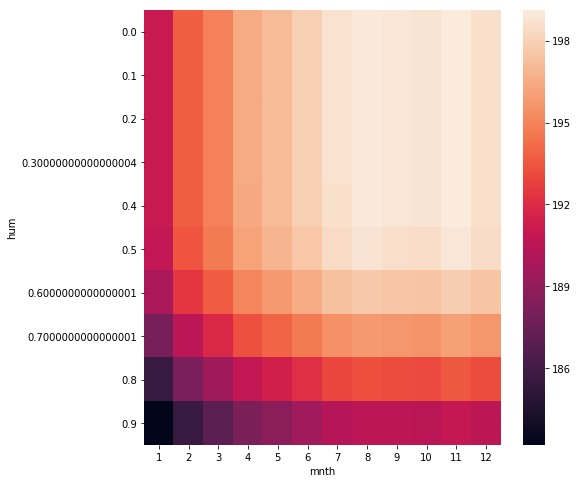

mnth vs windspeed


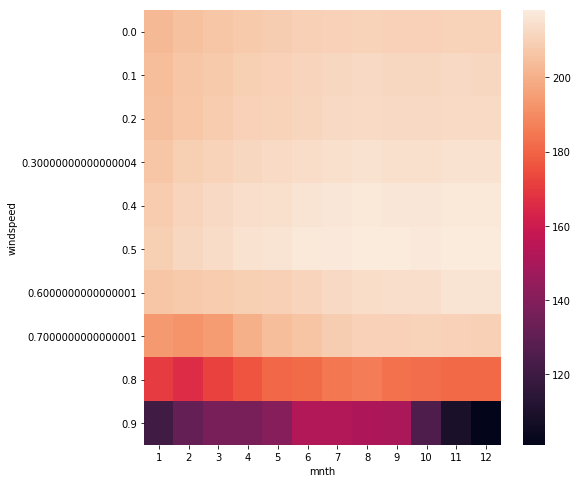

hr vs holiday


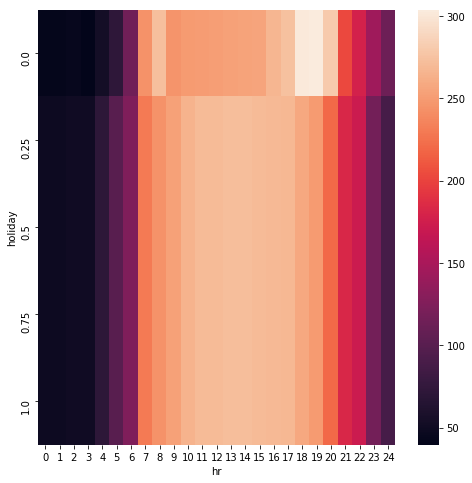

hr vs weekday


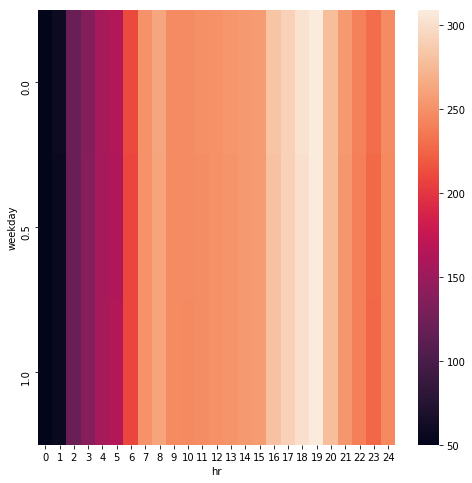

hr vs workingday


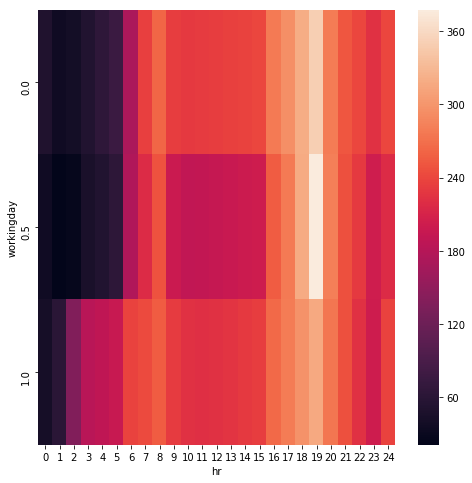

hr vs weathersit


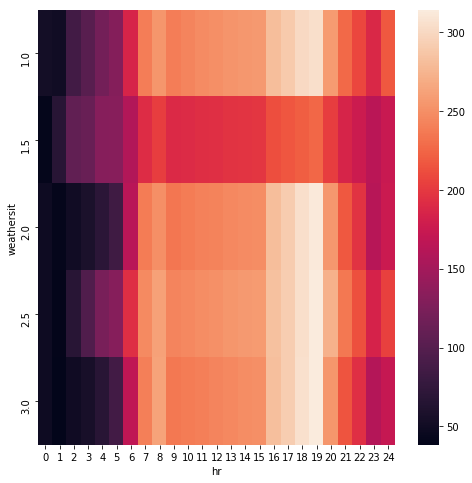

hr vs temp


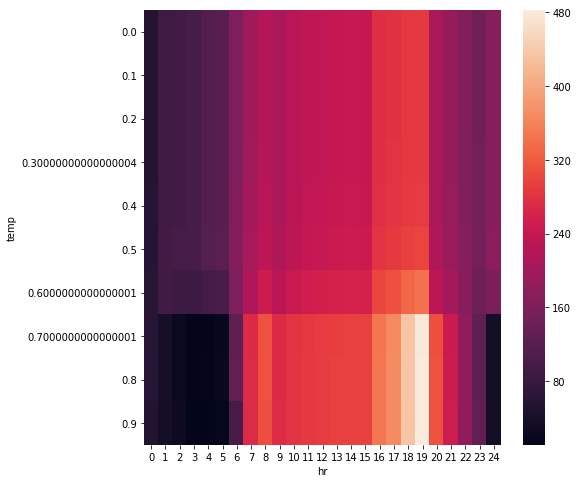

hr vs atemp


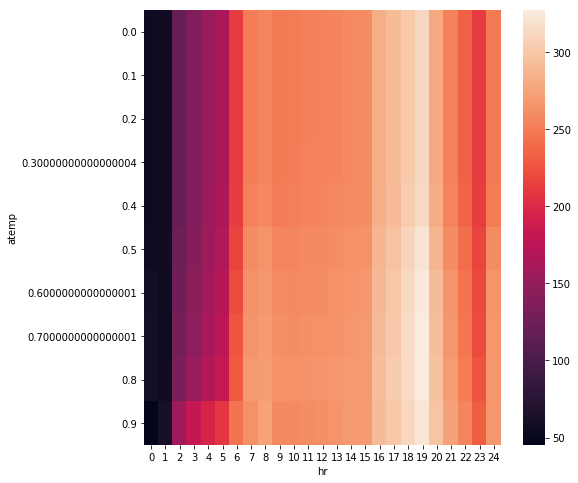

hr vs hum


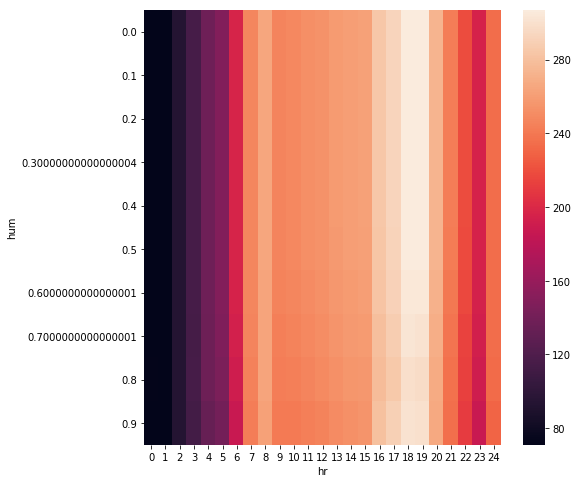

hr vs windspeed


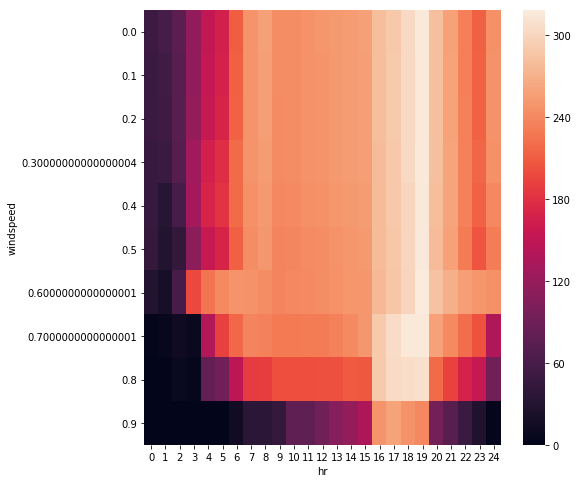

holiday vs weekday


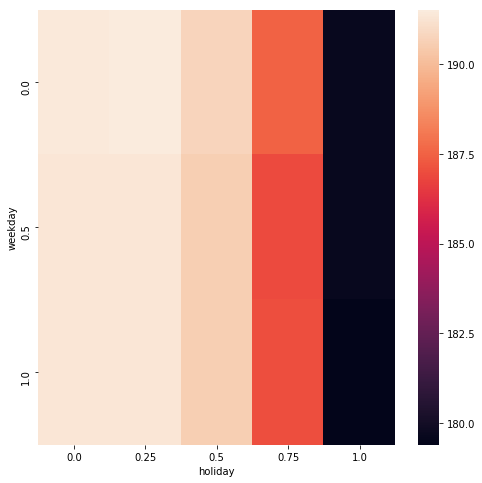

holiday vs workingday


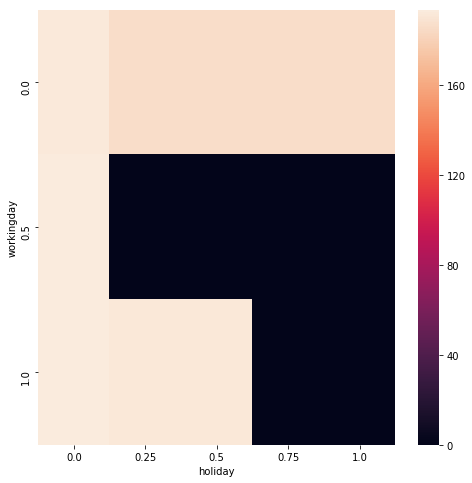

holiday vs weathersit


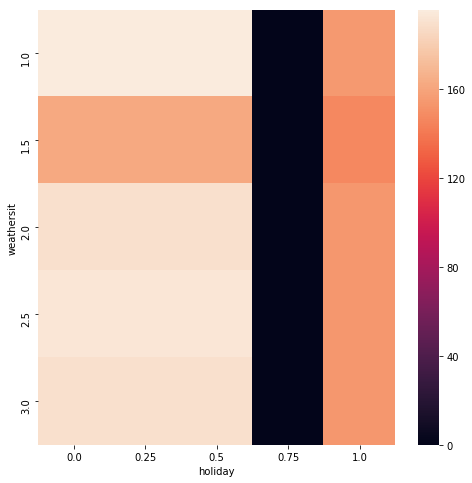

holiday vs temp


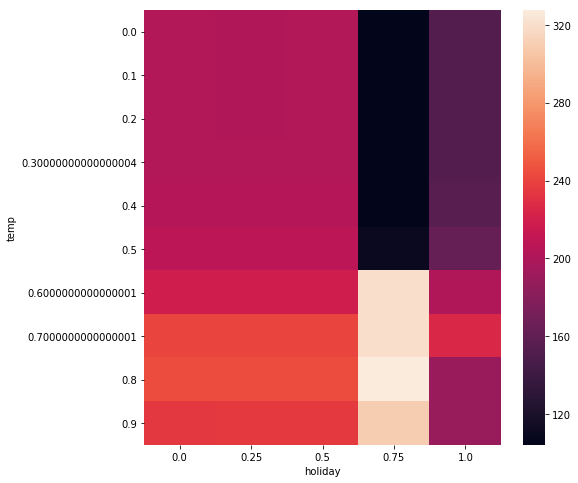

holiday vs atemp


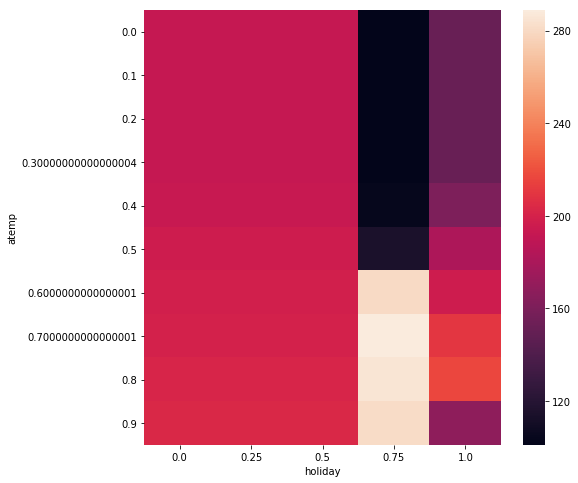

holiday vs hum


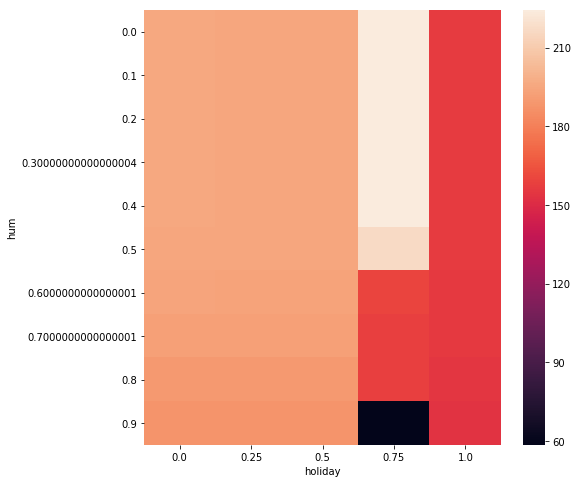

holiday vs windspeed


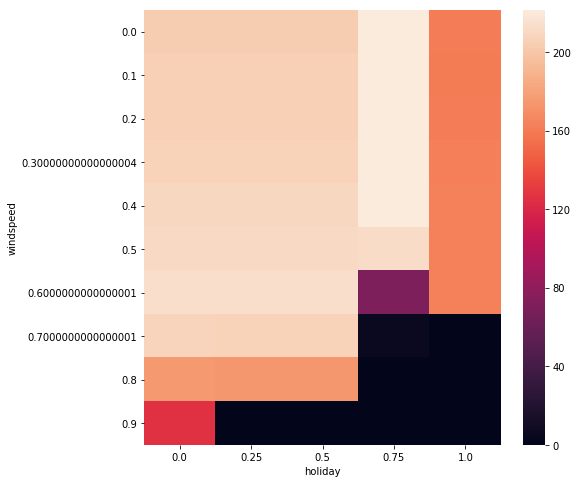

weekday vs workingday


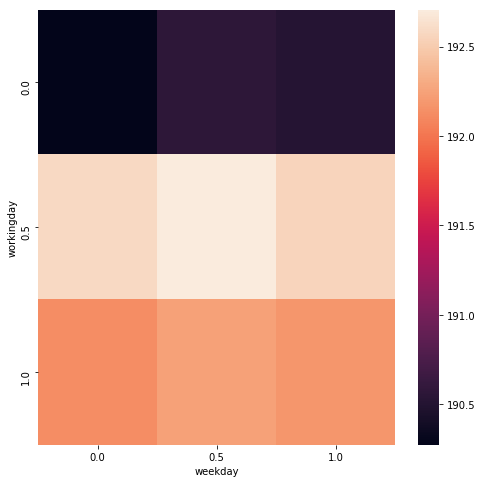

weekday vs weathersit


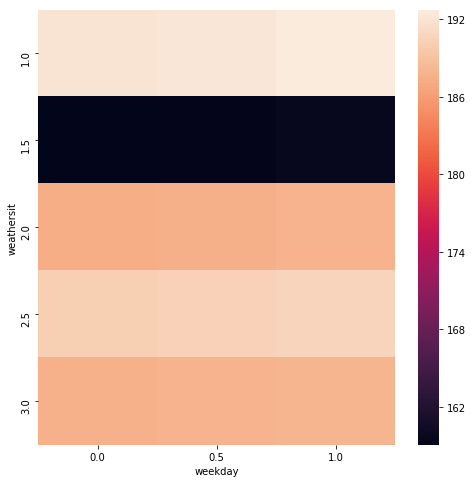

weekday vs temp


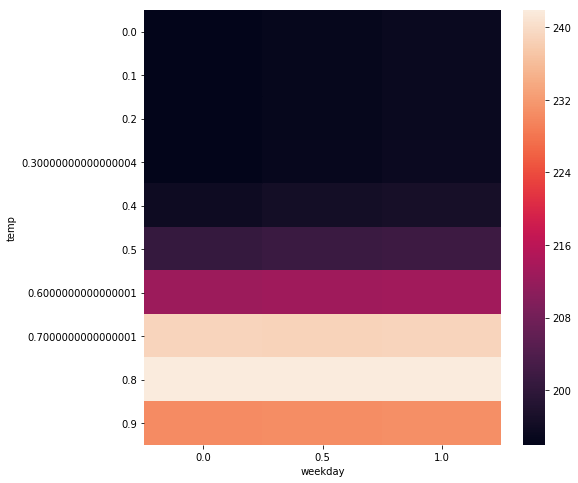

weekday vs atemp


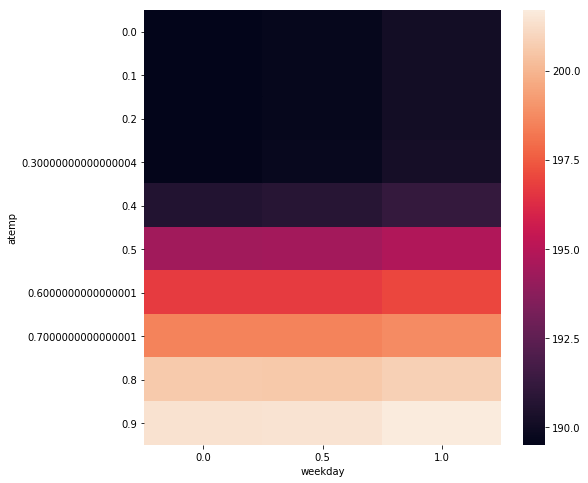

weekday vs hum


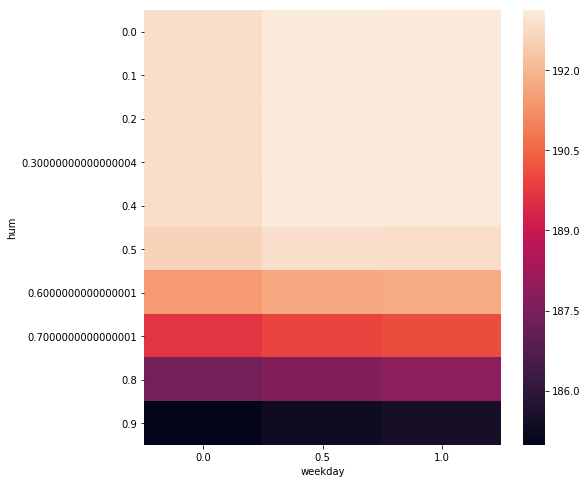

weekday vs windspeed


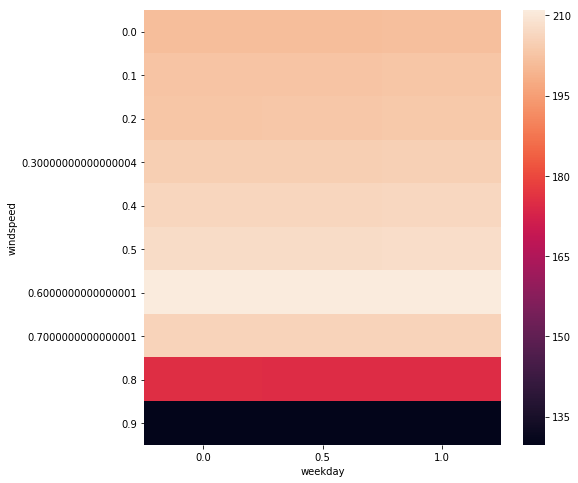

workingday vs weathersit


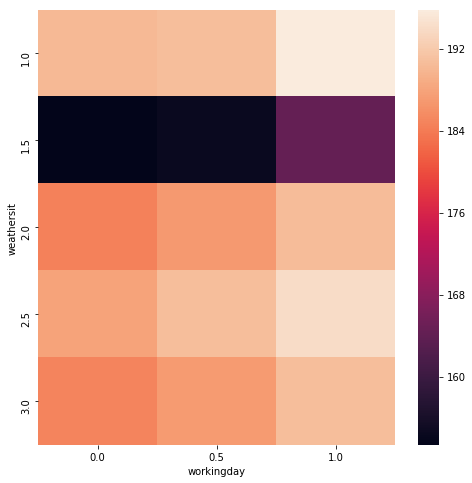

workingday vs temp


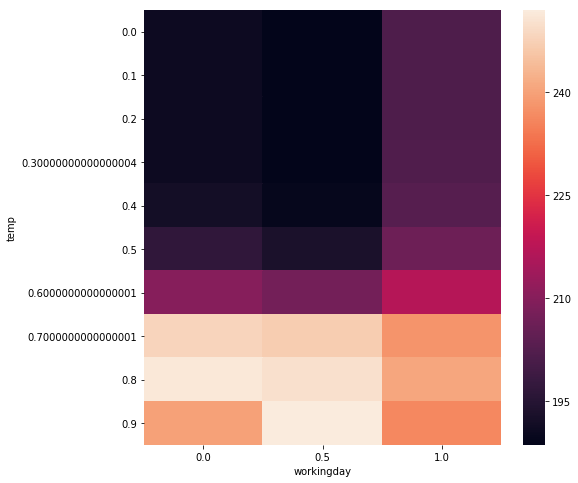

workingday vs atemp


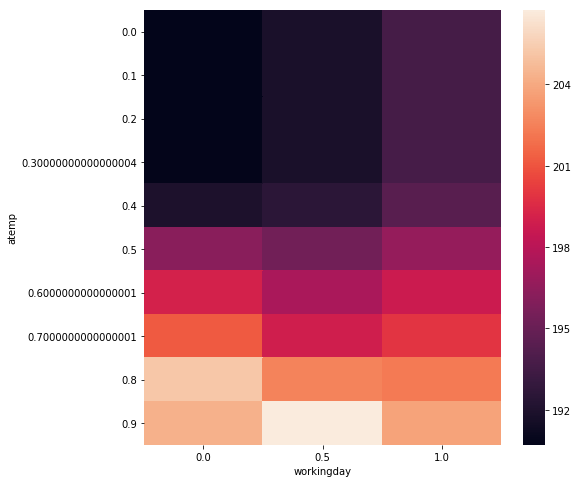

workingday vs hum


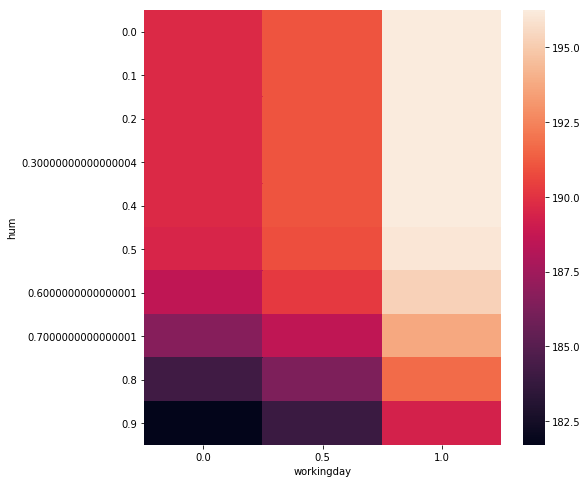

workingday vs windspeed


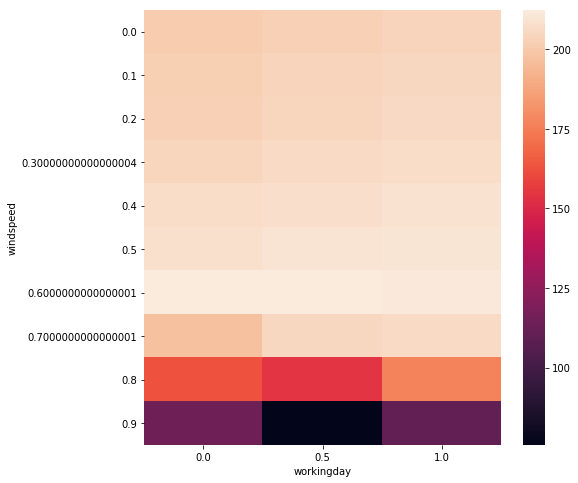

weathersit vs temp


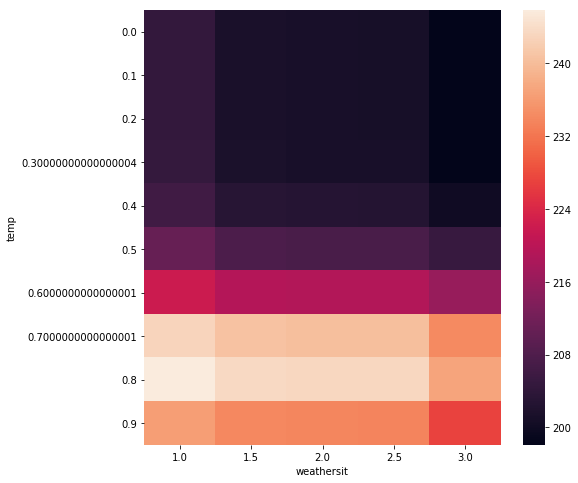

weathersit vs atemp


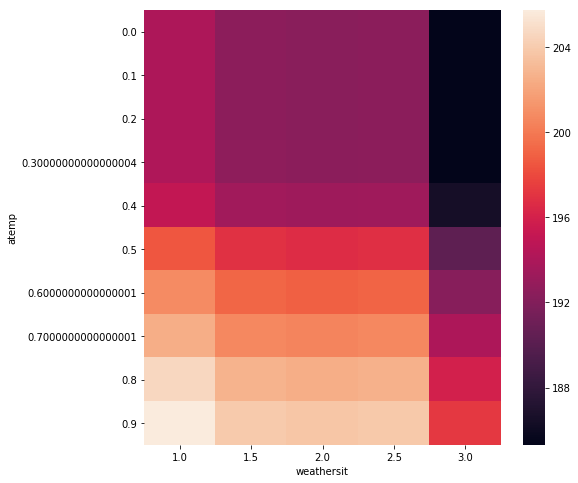

weathersit vs hum


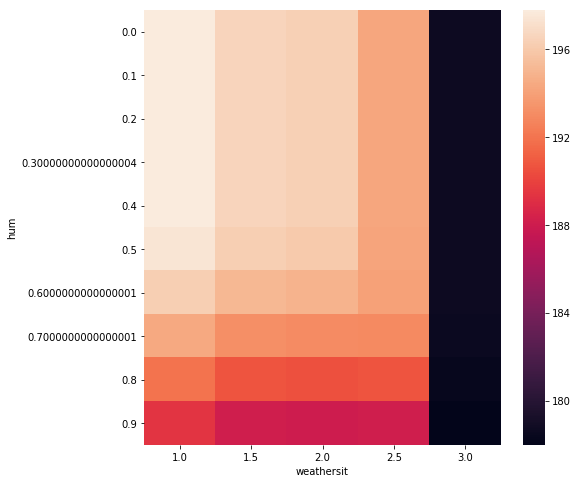

weathersit vs windspeed


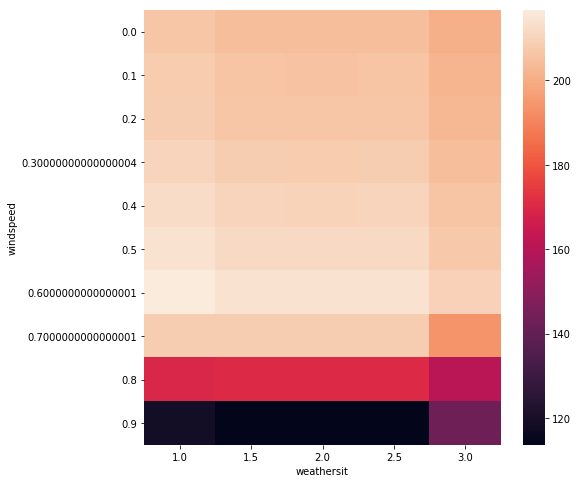

temp vs atemp


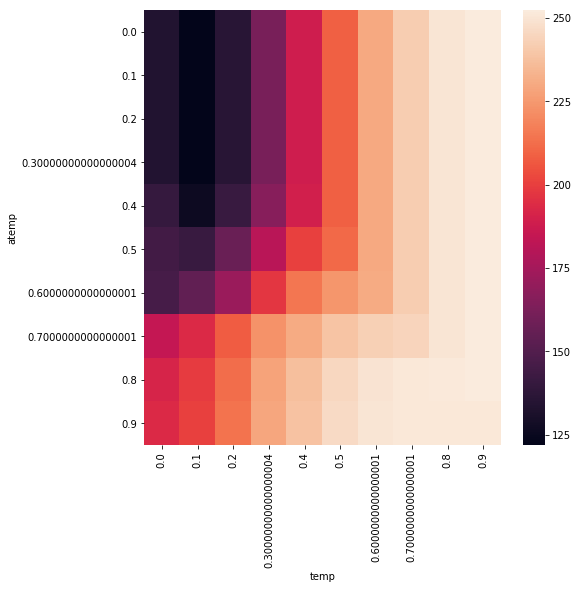

temp vs hum


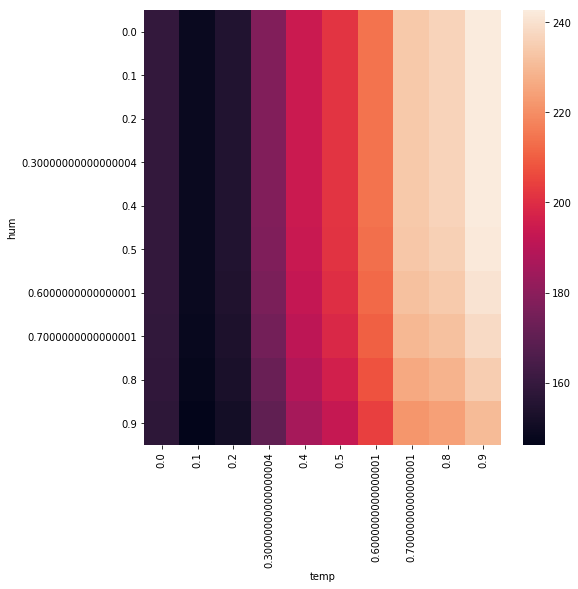

temp vs windspeed


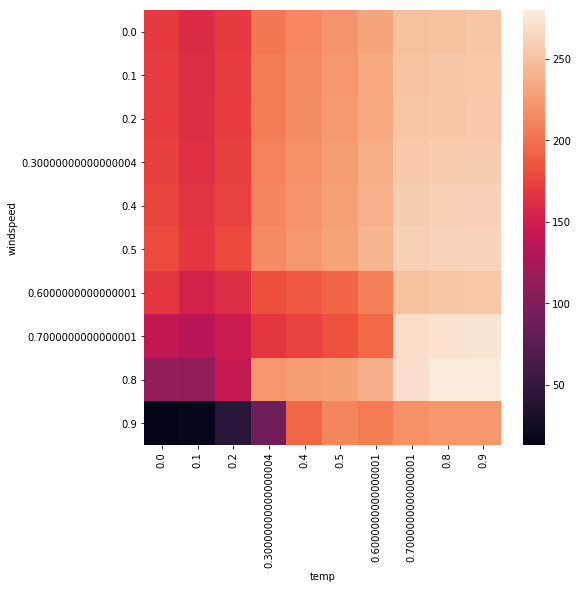

atemp vs hum


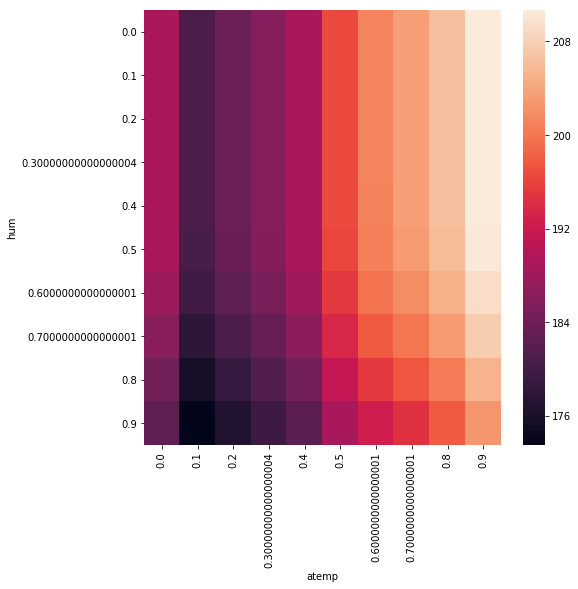

atemp vs windspeed


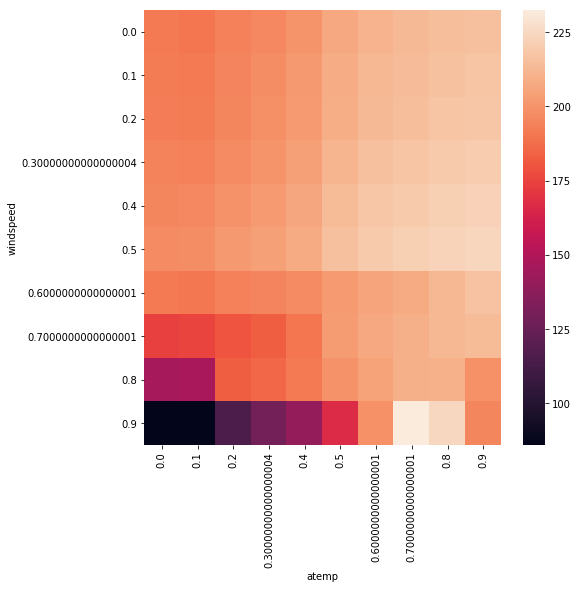

hum vs windspeed


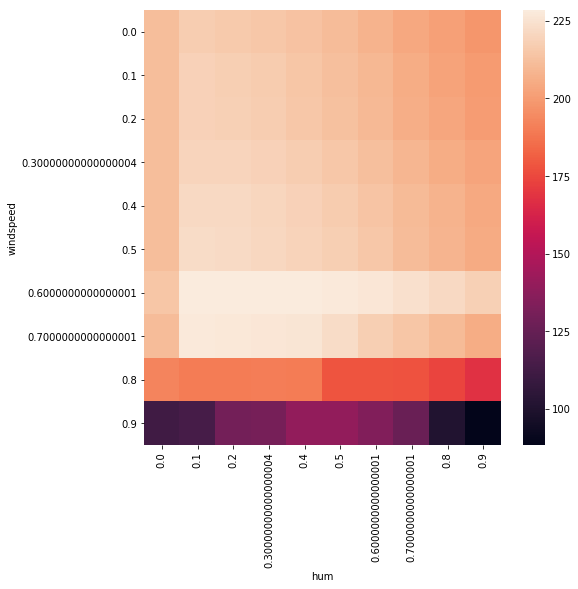

In [19]:
inds = np.arange(12)
Ses = list(combinations(inds, 2))
maps = {}
for pair in Ses:
    maps_i = {}
    x_ind = min(pair)
    y_ind = max(pair)
    S = np.zeros(12)
    S[x_ind] = 1
    S[y_ind] = 1
    grid = make_map_forest(forest, X, y, S, feat_intervals[x_ind], feat_intervals[y_ind], feat_di[x_ind], feat_di[y_ind], C = 3, continuous_y = True)
    maps_i["dac"] = grid
    x_rng = np.arange(feat_intervals[x_ind][0], feat_intervals[x_ind][1], feat_di[x_ind])
    y_rng = np.arange(feat_intervals[y_ind][0], feat_intervals[y_ind][1], feat_di[y_ind])
    C = pd.Index(x_rng, name=features[x_ind])
    R = pd.Index(y_rng, name=features[y_ind])
    grid_df = pd.DataFrame(data=grid, index=R, columns=C)
    print(features[x_ind], "vs", features[y_ind])
    fig, ax = plt.subplots(figsize=(8,8)) 
    sns.heatmap(grid_df)
    plt.show()